# Recommendations Systems
## Assignment 3:  Neural Collaborative Filtering

**By:**  

Gil Zeevi<br>
Gil Ayache


**The goal of this assignment is to:**
- Understand the concept of recommendations based on implicit data which is very common in real life.
- Understand how DL components can be used to implement a collaborative filtering & hybrid approach recommenders.
- Understand pros&cons comparing to other recommender system approaches.
- Practice recommender system training and evaluation.

**Instructions:**
- Students will form teams of two people each, and submit a single homework for each team.
- The same score for the homework will be given to each member of the team.
- Your solution in the form of an Jupyter notebook file (with extension ipynb).
- Images/Graphs/Tables should be submitted inside the notebook.
- The notebook should be runnable and properly documented. 
- Please answer all the questions and include all your code.
- English only.

**Submission:**
- Submission of the homework will be done via Moodle by uploading a Jupyter notbook.
- The homwork needs to be entirely in English.
- The deadline for submission is on Moodle.

**Requirements:**  
- Python 3.6 should be used. 
- You may use Torch/Keras/TF packeges.
- You should implement the recommender system by yourself using only basic Python libraries (such as numpy).

**LINKS:**
- <a href='https://github.com/hexiangnan/neural_collaborative_filtering/tree/master/Data'>Dataset</a>
- <a href='https://github.com/hexiangnan/neural_collaborative_filtering'>Repository</a>
- <a href='https://towardsdatascience.com/paper-review-neural-collaborative-filtering-explanation-implementation-ea3e031b7f96'>Blog Post Review</a>
<br>

**Google <a href='https://colab.research.google.com/'>Colaboratory</a>**  
        
    This is a great academic tool for students. Instead of installing and running "everything" on your Laptop - which probably will take you a lot of time - you can use Google Colab.  
    Basically, you can use it for all your Python needs.  

**PyTorch <a href='https://pytorch.org/tutorials/beginner/basics/intro.html'>Tutorials</a>**   
    
    Just follow steps 0-7 and you will have the basics skills to understand, build, and run DL recommender models. 

**Keras Kaggle's <a href='https://www.kaggle.com/learn/intro-to-deep-learning'>intro-to-deep-learning</a>**  
    
    This will give you a quick idea of what DL is, and how to utilize it.  
    They're using TensorFlow, while in our MLDL program we're using PyTorch.  




**Grading:**

- Q1 - 20 points - Dataset Preparation
- Q2 - 50 points - Neural Collaborative Filtering
- Q3 - 30 points - Loss Function

`Total: 100`

<br><br><br>

**Prerequisites**

In [1]:
# !pip install --quiet

**Imports**

In [951]:
# basic
import os 
import sys
import math
import heapq
import argparse
from time import time
import multiprocessing
from tqdm.notebook import tqdm
from ast import literal_eval

# general
import warnings
import numpy as np
import scipy as sp
import pandas as pd
import scipy.sparse as sp

# visual
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# visual 3D
from mpl_toolkits import mplot3d

# notebook
from IPython.display import display, HTML


# torch
import torch
from torch import nn
import torch.nn.functional as F
from torch.nn import Sequential
from torch.nn import Sigmoid,ReLU
from torch.nn import Embedding,Linear,Dropout
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor,Compose
from torch.optim import SparseAdam,Adam,Adagrad,SGD

warnings.filterwarnings('ignore')
# Keras
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import initializers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Dense,Lambda,Activation
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.models import Sequential,Model,load_model,save_model
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Embedding,Input,Dense,Reshape,Flatten,Dropout,Multiply,Concatenate

# colab
# from google.colab import drive  

**Hide Warnings**

In [3]:
warnings.filterwarnings('ignore')

**Disable Autoscrolling**

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

<br><br><br>
<br><br><br>
<br><br><br>

## Question 1: Dataset Preparation (Ingestion)
<br><br>

This implementation contains one file for training and two files for testing:   
- ml-1m.train.rating   
- ml-1m.test.rating  
- ml-1m.test.negative   

<br>
(feel free to use visual explanations)
<br>

a. **Explain** the role and structure of each file and how it was created from the original <a href='https://github.com/hexiangnan/neural_collaborative_filtering/tree/master/Data'>MovieLens 1M rating dataset</a>.

Dataset
Was provided by hexiangnan - 
 two processed datasets: MovieLens 1 Million (ml-1m) and Pinterest (pinterest-20) - we will use only the MovieLens dataset.

> train.rating:

* Train file (Positive interactions only - ie that the user interacted with).
* Each Line is a training instance: userID, itemID, rating, timestamp (if have).

* Creation:
Was created from the original MovieLens 1M rating dataset:
This dataset was generated explicitly from the rating.dat 
dataset, as in the original MovieLens 1M dataset - rating.dat, 
the dataset is as follows:
UserID::MovieID::Rating::Timestamp

> test.rating:

* Test file (positive instances).
* Each Line is a testing instance:  userID, itemID, rating, timestamp (if have).

* Creation:
Was created from the original MovieLens 1M rating dataset:
this dataset was generated from the same dataset as 
training.rating was created, the only difference, for each user 
only one item was picked, the item with the highest timestamp. 
The original dataset MovieLens 1M - rating.bat is structured as 
follow:
UserID::MovieID::Rating::Timestamp
so, for each user, they picked the item with highest TimeStamp

> test.negative:

* Test file (negative instances - that the user didn't interact with).
* Each line corresponds to the line of test.rating, containing 99 negative samples.

  Each line is in the format: (userID,itemID), negativeItemID1, negativeItemID2 ...
first column represents the last item a specific user interacted
with, all the following 99 columns represents all the items the 
user did not interacted with, or in other words had a negative 
interaction with.

* Creation:
Was created from the original MovieLens 1M rating dataset:
for each user, they took 99 instances which was not interacted 
with the specific user from the rating.dat dataset.



b. **Explain** how the training dataset is created.

This dataset was generated explicitly from the rating.dat dataset,
as in the original MovieLens 1M dataset - rating.bat, the dataset is as follows:
UserID::MovieID::Rating::Timestamp
will include all the ratings besides the last rating of each user (sorted by the timestamp).

c. **Explain** how the test dataset is created.

It was created from the original MovieLens 1M rating dataset:
this dataset was generated from the same dataset as training.rating was created, 
the only difference, for each user only one item was picked, the item with the highest timestamp.
the original dataset MovieLens 1M - rating.bat is structured as follow:
UserID::MovieID::Rating::Timestamp
so, for each user, they picked the item with highest TimeStamp

#### Data Preperations:

In [5]:
class Dataset(object):
    '''
    classdocs
    '''

    def __init__(self, path):
        '''
        Constructor
        '''
        self.trainMatrix = self.load_rating_file_as_matrix(path + ".train.rating")
        self.testRatings = self.load_rating_file_as_list(path + ".test.rating")
        self.testNegatives = self.load_negative_file(path + ".test.negative")
        assert len(self.testRatings) == len(self.testNegatives)
        
        self.num_users, self.num_items = self.trainMatrix.shape
        
    def load_rating_file_as_list(self, filename):
        ratingList = []
        with open(filename, "r") as f:
            line = f.readline()
            while line != None and line != "":
                arr = line.split("\t")
                user, item = int(arr[0]), int(arr[1])
                ratingList.append([user, item])
                line = f.readline()
        return ratingList
    
    def load_negative_file(self, filename):
        negativeList = []
        with open(filename, "r") as f:
            line = f.readline()
            while line != None and line != "":
                arr = line.split("\t")
                negatives = []
                for x in arr[1: ]:
                    negatives.append(int(x))
                negativeList.append(negatives)
                line = f.readline()
        return negativeList
    
    def load_rating_file_as_matrix(self, filename):
        '''
        Read .rating file and Return dok matrix.
        The first line of .rating file is: num_users\t num_items
        '''
        # Get number of users and items
        num_users, num_items = 0, 0
        with open(filename, "r") as f:
            line = f.readline()
            while line != None and line != "":
                arr = line.split("\t")
                u, i = int(arr[0]), int(arr[1])
                num_users = max(num_users, u)
                num_items = max(num_items, i)
                line = f.readline()
        # Construct matrix
        mat = sp.dok_matrix((num_users+1, num_items+1), dtype=np.float32)
        with open(filename, "r") as f:
            line = f.readline()
            while line != None and line != "":
                arr = line.split("\t")
                user, item, rating = int(arr[0]), int(arr[1]), float(arr[2])
                if (rating > 0):
                    mat[user, item] = 1.0
                line = f.readline()    
        return mat

In [6]:
def get_train_instances(train, num_negatives):
    user_input, item_input, labels = [],[],[]
    num_users = train.shape[0]
    for (u, i) in train.keys():
        # positive instance
        user_input.append(u)
        item_input.append(i)
        labels.append(1)
        # negative instances
        for t in range(num_negatives):
            j = np.random.randint(num_items)
            while (u, j) in train:
                j = np.random.randint(num_items)
            user_input.append(u)
            item_input.append(j)
            labels.append(0)
    return user_input, item_input, labels

In [7]:
DATASET_PATH = 'data\\ml-1m'
dataset = Dataset(DATASET_PATH)
train, testRatings, testNegatives = dataset.trainMatrix, dataset.testRatings, dataset.testNegatives
num_users, num_items = train.shape
print("Load data done: #user=%d, #item=%d, #train=%d, #test=%d" 
      %(num_users, num_items, len(train), len(testRatings)))

Load data done: #user=6040, #item=3706, #train=994169, #test=6040


<br><br><br>
<br><br><br>
<br><br><br>

## Question 2: Neural Collaborative Filtering 
<br><br>

## a. Build the following four models using the neural collaborative filtering approach: 
- Matrix Factorization (MF)
- Multi layer perceptron (MLP)
- Generalized Matrix Factorization (GMF) 
- NeuroMatrixFactorization (NMF)


**we Based the next parts on hexiangnan implementations which were represented to us: https://github.com/hexiangnan/neural_collaborative_filtering**

<br><br><br><br>
**Matrix Factorization (MF)**

<br>

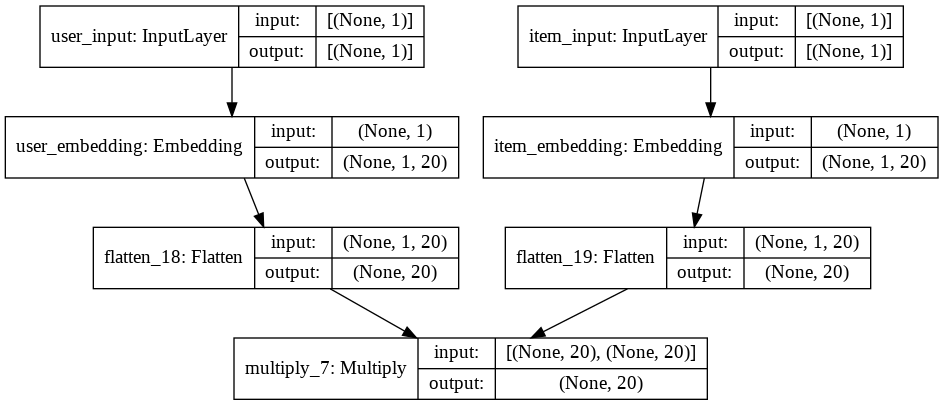

In [8]:
model_MF = None

In [10]:
def get_MF_model(num_users, num_items, latent_dim):
    # Vanilla Matrix Factorization
    
    # Input layer
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

    # Latent layer
    MF_Embedding_User = Embedding(input_dim = num_users, output_dim = latent_dim,\
                                  name = 'user_embedding', input_length=1)
    MF_Embedding_Item = Embedding(input_dim = num_items, output_dim = latent_dim,\
                                  name = 'item_embedding', input_length=1)
    
    # flatten an embedding vector
    user_latent = Flatten()(MF_Embedding_User(user_input))
    item_latent = Flatten()(MF_Embedding_Item(item_input))
    
    
    # Element-wise dot product of user and item embeddings
    prediction = keras.layers.dot([user_latent,item_latent], axes=1,normalize=False)
    
    # Model
    model = Model(inputs=[user_input, item_input], outputs=prediction, name='MF')

    return model

<br><br><br><br><br><br>
**Multi Layer Perceptron (MLP)**
<br>
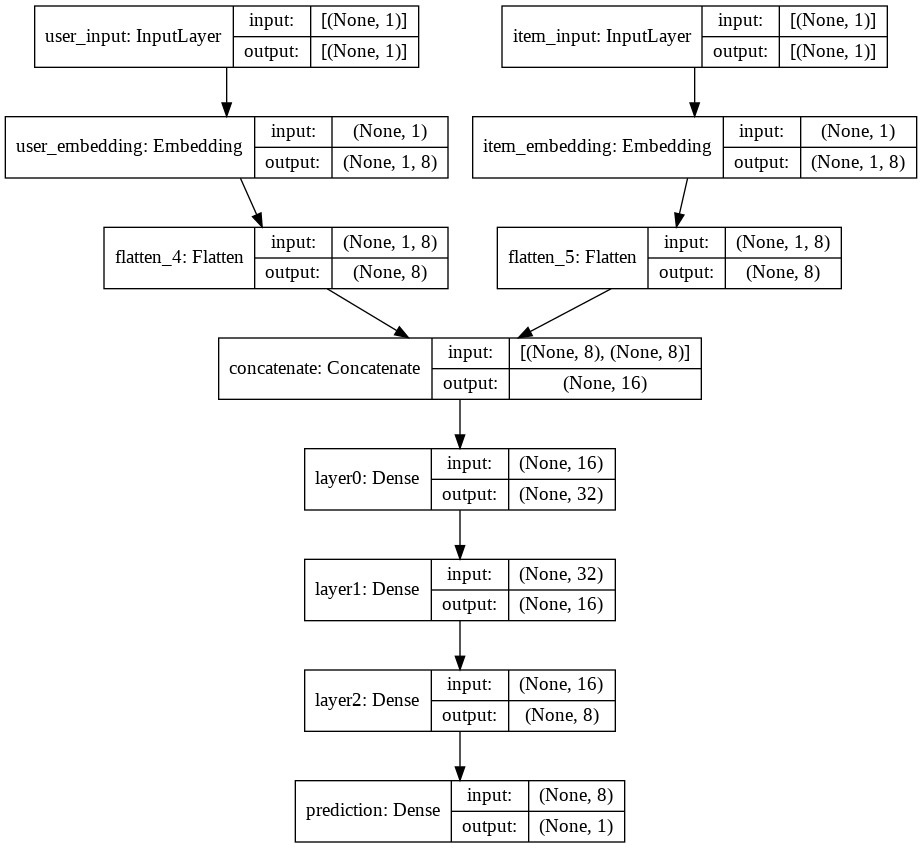

In [11]:
model_MLP = None

In [12]:
def get_MLP_model(num_users, num_items, latent_dim, regs=[[0,0],0,0], layers = [20,10]):
    #Multi-Layer Perceptron
    
    assert len(layers) + 1 == len(regs)
    num_layer = len(layers) #Number of layers in the MLP
    # Input variables
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

    MLP_Embedding_User = Embedding(input_dim = num_users, output_dim = latent_dim, name = 'user_embedding',
                                   embeddings_regularizer = l2(regs[0][0]), input_length=1,embeddings_initializer=RandomNormal(mean=0.0, stddev=0.01))
    MLP_Embedding_Item = Embedding(input_dim = num_items, output_dim = latent_dim, name = 'item_embedding',
                                   embeddings_regularizer = l2(regs[0][1]), input_length=1,embeddings_initializer=RandomNormal(mean=0.0, stddev=0.01))
    
    # Crucial to flatten an embedding vector!
    user_latent = Flatten()(MLP_Embedding_User(user_input))
    item_latent = Flatten()(MLP_Embedding_Item(item_input))
    
    # Concatenation of embedding layers
    vector = Concatenate(axis=-1)([user_latent, item_latent])
    
    # MLP layers
    for idx in range(num_layer):
        layer = Dense(layers[idx], kernel_regularizer = l2(regs[idx+1]), activation='relu', name = 'layer%d' %idx)
        vector = layer(vector)
        
    # Final prediction layer
    prediction = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'prediction')(vector)

    # Model
    model = Model(inputs=[user_input, item_input], outputs=prediction,name = 'MLP')
    return model

<br><br><br><br><br><br>
**Generalized Matrix Factorization (GMF)**
<br>
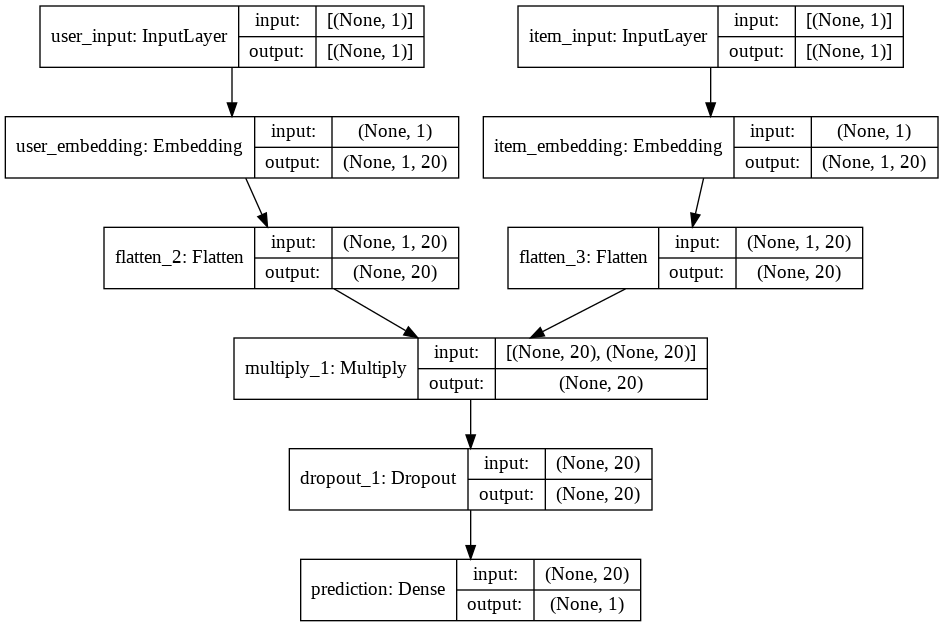

In [13]:
model_GMF = None

In [14]:
def get_GMF_model(num_users, num_items, latent_dim, regs=[[0,0]]):
    # Generalized Matrix Factorization
    
    # Input variables
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
    
    # latent dimentsion layer
    MF_Embedding_User = Embedding(input_dim = num_users, output_dim = latent_dim, name = 'user_embedding',
                                   embeddings_regularizer = l2(regs[0][0]), input_length=1,embeddings_initializer=RandomNormal(mean=0.0, stddev=0.01)) 
    MF_Embedding_Item = Embedding(input_dim = num_items, output_dim = latent_dim, name = 'item_embedding',
                                   embeddings_regularizer = l2(regs[0][1]), input_length=1,embeddings_initializer=RandomNormal(mean=0.0, stddev=0.01)) 
    
    # Crucial to flatten an embedding vector!
    user_latent = Flatten()(MF_Embedding_User(user_input))
    item_latent = Flatten()(MF_Embedding_Item(item_input))
    
    # Element-wise product of user and item embeddings 
    predict_vector = Multiply()([user_latent, item_latent])
    
    # Final prediction layer
    prediction = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'prediction')(predict_vector)
    
    model = Model(inputs=[user_input, item_input], outputs=prediction,name = 'GMF')
    return model
    

<br><br><br><br><br><br>
**NeuroMatrixFactorization (NMF)**

<br>

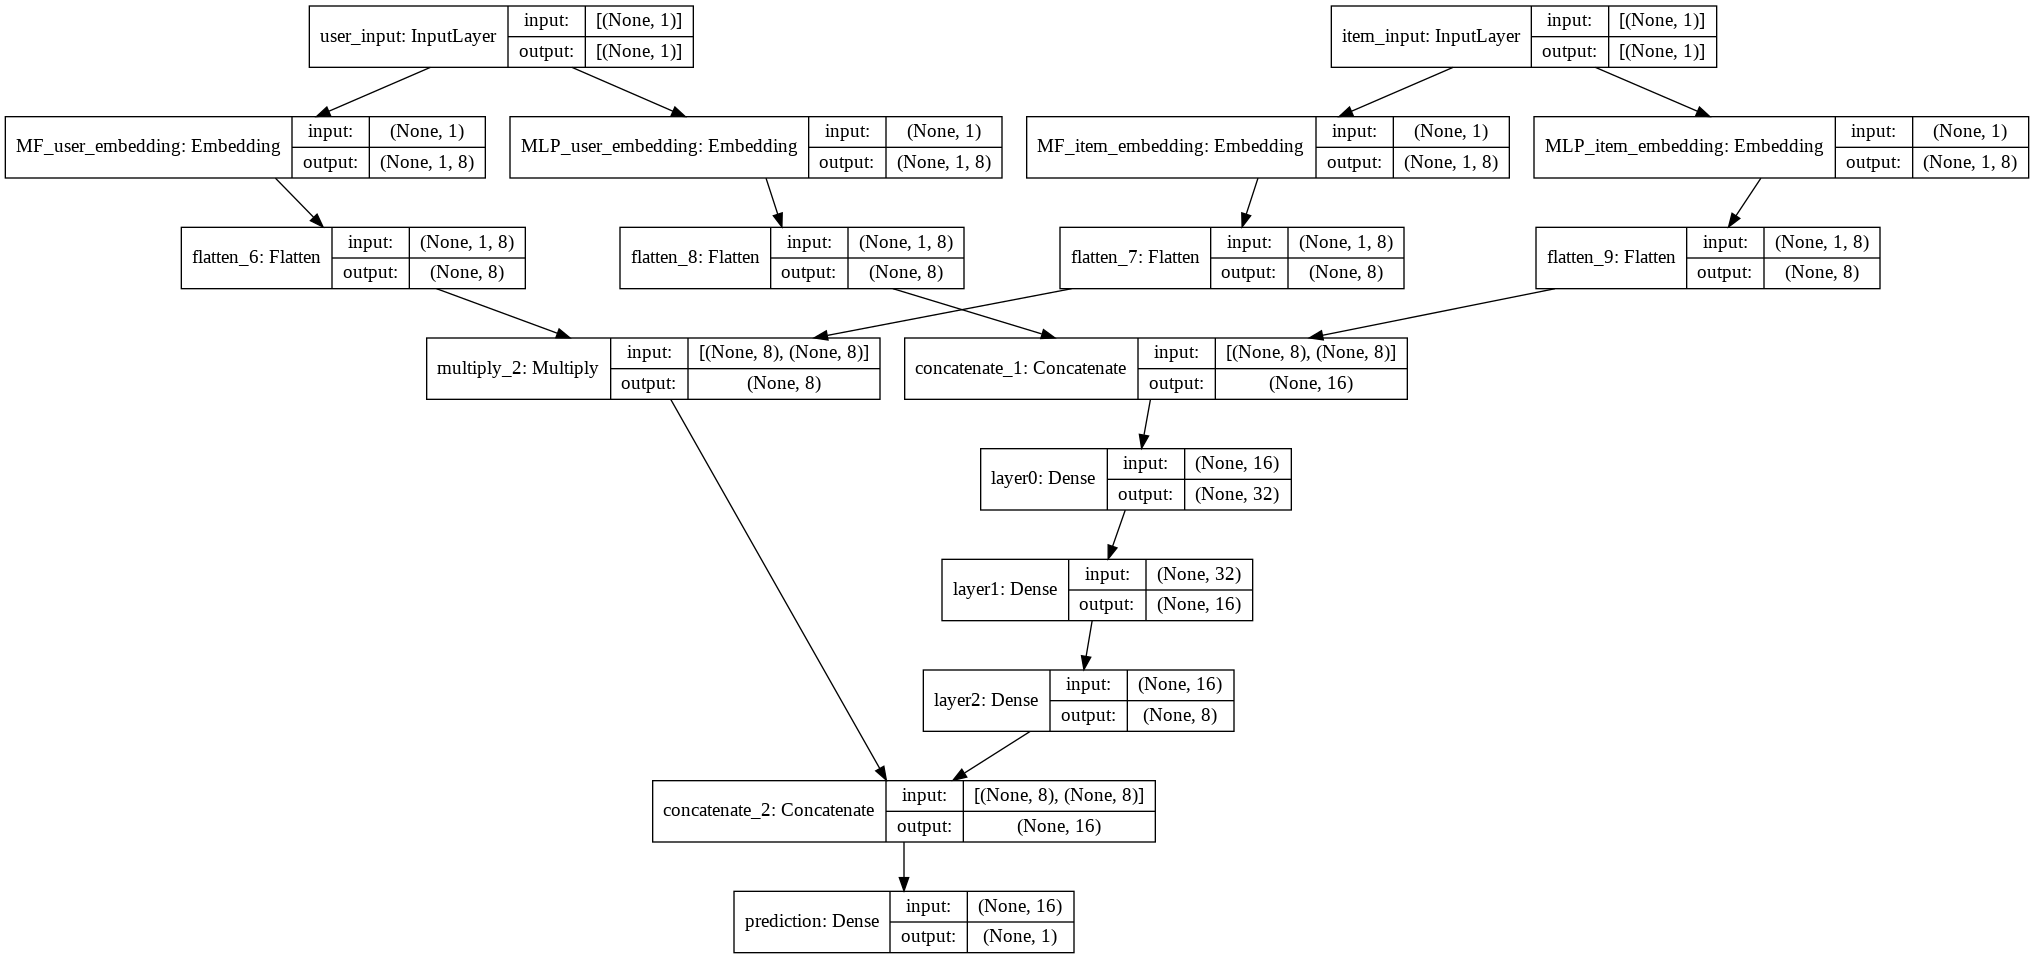

In [15]:
model_NMF = None

In [836]:
def get_NMF_model(num_users, num_items, latent_dim_GMF, latent_dim_MLP, reg_GMF=[[0,0]], regs_MLP=[[0,0],0,0], layers=[20,10],final_ac='sigmoid',name='NMF'):

    # input
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
    
    
    # MF - latent layer
    MF_Embedding_User = Embedding(input_dim = num_users, output_dim = latent_dim_GMF, name = 'MF_user_embedding',embeddings_regularizer = l2(reg_GMF[0][0]), input_length=1,embeddings_initializer=RandomNormal(mean=0.0, stddev=0.01)) #init = init_normal,
    MF_Embedding_Item = Embedding(input_dim = num_items, output_dim = latent_dim_GMF, name = 'MF_item_embedding',embeddings_regularizer = l2(reg_GMF[0][1]), input_length=1,embeddings_initializer=RandomNormal(mean=0.0, stddev=0.01))  #init = init_normal, 
    
    # MF - flat
    mf_user_latent = Flatten()(MF_Embedding_User(user_input))
    mf_item_latent = Flatten()(MF_Embedding_Item(item_input))
    
    # MF - Multiply
    mf_vector = Multiply()([mf_user_latent, mf_item_latent])
    
    # MLP - latent layer
    MLP_Embedding_User = Embedding(input_dim = num_users, output_dim = latent_dim_MLP, name = 'MLP_user_embedding',embeddings_regularizer = l2(regs_MLP[0][0]), input_length=1,embeddings_initializer=RandomNormal(mean=0.0, stddev=0.01)) #init = init_normal,
    MLP_Embedding_Item = Embedding(input_dim = num_items, output_dim = latent_dim_MLP, name = 'MLP_item_embedding',embeddings_regularizer = l2(regs_MLP[0][1]), input_length=1,embeddings_initializer=RandomNormal(mean=0.0, stddev=0.01)) #init = init_normal,
    
    # MLP - flat
    mlp_user_latent = Flatten()(MLP_Embedding_User(user_input))
    mlp_item_latent = Flatten()(MLP_Embedding_Item(item_input))
    
    # MLP - Concatenate
    mlp_vector = Concatenate(axis=-1)([mlp_user_latent, mlp_item_latent])
    
    # MLP - fully connected layers
    for idx in range(len(layers)):
        layer =  Dense(layers[idx], kernel_regularizer = l2(regs_MLP[idx+1]), activation='tanh', name = 'layer%d' %idx)
        mlp_vector = layer(mlp_vector)

    # Concatenate - MF & MLP
    predict_vector = Concatenate(axis=-1)([mf_vector, mlp_vector])
    
    # fully connected layer
    prediction = Dense(1, activation=final_ac, kernel_initializer='lecun_uniform', name = "prediction")(predict_vector)    
    
    # model
    model = Model(inputs=[user_input, item_input], outputs=prediction,name=name)
    return model

<br><br><br><br><br><br>

## b. Train and evaluate the recommendations accuracy of the models: 
- MF
- GMF
- MLP
- NMF

Compare the learning curve and recommendations accuracy using NDCG and MRR metrics with cutoff values of 5 and 10.   
Discuss the comparison. 

**Metrics:**
- HitRatio
- nDCG
- MRR

In [18]:
# from hexiangnan github

def getHitRatio(ranklist, gtItem):
    for item in ranklist:
        if item == gtItem:
            return 1
    return 0

def getNDCG(ranklist, gtItem):
    for i in range(len(ranklist)):
        item = ranklist[i]
        if item == gtItem:
            return math.log(2) / math.log(i+2)
    return 0
  
def getMRR(ranklist, gtItem):
    num_movies_tested = 0
    for item in ranklist:
        num_movies_tested += 1
        if item == gtItem:
            mrr = 1 / num_movies_tested
            return mrr
    return 0

In [19]:
# Use your own metrics implementation OR use external packages for the metrics.
# If you are using external packages make sure they work properly. 
# A lot of the packages available does not work as you would expect.

**Evaluation:**

In [36]:
# from hexiangnan github

# Global variables that are shared across processes
_model = None
_testRatings = None
_testNegatives = None
_K = None

def evaluate_model(model, testRatings, testNegatives, K, num_thread):
    """
    Evaluate the performance (Hit_Ratio, NDCG) of top-K recommendation
    Return: score of each test rating.
    """
    global _model
    global _testRatings
    global _testNegatives
    global _K
    _model = model
    _testRatings = testRatings
    _testNegatives = testNegatives
    _K = K
        
    hits, ndcgs, mrrs = [],[],[]
    if(num_thread > 1): # Multi-thread
        pool = multiprocessing.Pool(processes=num_thread)
        res = pool.map(eval_one_rating, range(len(_testRatings)))
        pool.close()
        pool.join()
        hits = [r[0] for r in res]
        ndcgs = [r[1] for r in res]
        mrrs = [r[2] for r in res]
        return np.mean(hits), np.mean(ndcgs), np.mean(mrrs)

    # Single thread
    for idx in range(len(_testRatings)):
        (hr,ndcg,mrr) = eval_one_rating(idx)
        hits.append(hr)
        ndcgs.append(ndcg)  
        mrrs.append(mrr)    
    return np.mean(hits), np.mean(ndcgs), np.mean(mrrs)
    

def eval_one_rating(idx):
    rating = _testRatings[idx]
    items = _testNegatives[idx]
    u = rating[0]
    gtItem = rating[1]
    items.append(gtItem)
    
    # Get prediction scores
    map_item_score = {}
    users = np.full(len(items), u, dtype = 'int32')
    predictions = _model.predict([users, np.array(items)], batch_size=batch_size, verbose=0)
    
    for i in range(len(items)):
        item = items[i]
        map_item_score[item] = list(predictions[i])
    items.pop()

    # Evaluate top rank list
    ranklist = heapq.nlargest(_K, map_item_score, key=map_item_score.get)
    hr = getHitRatio(ranklist, gtItem)
    ndcg = getNDCG(ranklist, gtItem)
    mrr = getMRR(ranklist, gtItem)
    return (hr, ndcg, mrr)

**HyperParams:**

In [21]:
# the choosen hyperparams will effect your models & your grade 

##### Baseline parameters, some of them will be changed in the next cells

In [22]:

#dimensions hypeparameters:
num_factors = 8 

#samples
num_negatives = 4 

#eval metrics
top_5k = 5
top_10k = 10 
evaluation_threads = 1 

#training params
learning_rate = 0.001
epochs = 10
batch_size = 256
verbose = 1
write_model=  False

<br><br>
Create train data:

In [23]:
#creating beforehand the data to shorten the training time
data = []
labels = []

for i in range(epochs):
    user_data, item_data, label = get_train_instances(train, num_negatives)
    data.append([np.array(user_data), np.array(item_data)])
    labels.append(np.array(label))

<br><br>
train & eval:

In [438]:
results = pd.DataFrame(columns = ['model', 'topk','metric','score']) # as suggested to us
results

,model,topk,metric,score


In [790]:
def train(model):
    loss = []
    valid = []
    t = time()
    #apply fit:
    early_stop =0
    min_loss = 999
    val_loss = 999
    val_overfit = 0
    for epch in range(epochs):
        fitted = model.fit(data[epch], labels[epch], batch_size=batch_size, epochs=1, verbose=1, shuffle=True,
                            validation_split=0.2,use_multiprocessing=True)
        loss.extend(fitted.history['loss'])
        valid.extend(fitted.history['val_loss'])

        #early stopping
        if epch==0:
            min_loss = loss[-1]
            val_loss = valid[-1]
            continue
        if min_loss <= loss[-1]:
            early_stop+=1
            if early_stop>=3:
                break
        else:
            early_stop = 0
            min_loss = loss[-1]
        #avoid overfitting using validation
        if val_loss <= valid[-1]:
            val_overfit+=1
            val_loss = valid[-1]
            if val_overfit>=4:
                print('OVERFIT OCCURED! Stopping...')
                return #stop training - the model is overfitting - the parameters are disqualified
        else:
            val_overfit = 0
            val_loss = valid[-1]

        
    #add time
    results.loc[-1] = [model.name,0,'TIME',time()-t] ;results.reset_index(drop = True,inplace = True)
    #add loss    
    results.loc[-1] = [model.name,0,'LOSS',loss] ;results.reset_index(drop = True,inplace = True)
    #add validation    
    results.loc[-1] = [model.name,0,'VAL',valid] ;results.reset_index(drop = True,inplace = True)
    #evaluate
    eval_me(model,top_5k)  
    eval_me(model,top_10k)
    
def eval_me(model,topk):
    hr,ndcg,mrr = evaluate_model(model, testRatings, testNegatives, topk, evaluation_threads)
    results.loc[-1] = [model.name,topk,'HR',hr] ;results.reset_index(drop = True,inplace = True)
    results.loc[-1] = [model.name,topk,'NDCG',ndcg] ;results.reset_index(drop = True,inplace = True)
    results.loc[-1] = [model.name,topk,'MRR',mrr] ;results.reset_index(drop = True,inplace = True)
    

## Hyperparameters grid search:

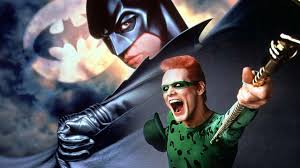

(Sorry, but a homework assignment in recommendation systems without some batman pics is not as fun, so we felt obliged to add one)

In [443]:
params = []
results_full = []
i = 0
for num_factors in tqdm([5,8,12,15,20]):
    for learning_rate in [0.0005,0.005,0.05]:
        for regul in [0,0.1,0.001]:
            i+=1
            print(f"### Iteration number {i} out of 45 ###")
            results = pd.DataFrame(columns = ['model', 'topk','metric','score']) # as suggested to us
            #mf
            model = get_MF_model(num_users, num_items, num_factors)
            model.compile(optimizer = Adam(lr=learning_rate), loss = 'binary_crossentropy')
            train(model)
            print('#')
            #mlp
            model= get_MLP_model(num_users, num_items, num_factors, regs = [[regul,regul],regul,regul,regul], layers = [32,16,8])
            model.compile(optimizer = Adam(lr=learning_rate), loss = 'binary_crossentropy')
            train(model)
            print('#')
            #gmf
            model= get_GMF_model(num_users, num_items, num_factors, regs=[[regul,regul]])
            model.compile(optimizer = Adam(lr=learning_rate), loss = 'binary_crossentropy')
            train(model)
            print('#')
            #nmf
            model = get_NMF_model(num_users, num_items, latent_dim_GMF=num_factors, latent_dim_MLP=num_factors, reg_GMF=[[regul,regul]], regs_MLP=[[regul,regul],regul,regul,regul], layers=[32,16,8])
            model.compile(optimizer = Adam(lr=learning_rate), loss = 'binary_crossentropy')
            train(model)
            print('#')
            #save history
            params.append([num_factors,learning_rate,regul])
            results_full.append(results.copy())

  0%|          | 0/5 [00:00<?, ?it/s]

### Iteration number 1 out of 45 ###
31068/31068 [==============================] - 25s 797us/step - loss: 0.4524 - val_loss: 1.9345
#
31068/31068 [==============================] - 25s 805us/step - loss: 0.3120 - val_loss: 0.3945
OVERFIT OCCURED! Stopping...
#
31068/31068 [==============================] - 21s 687us/step - loss: 0.3199 - val_loss: 0.6625
OVERFIT OCCURED! Stopping...
#
31068/31068 [==============================] - 31s 996us/step - loss: 0.2763 - val_loss: 0.3792
OVERFIT OCCURED! Stopping...
#
### Iteration number 2 out of 45 ###
31068/31068 [==============================] - 24s 759us/step - loss: 0.4354 - val_loss: 2.0030
#
31068/31068 [==============================] - 27s 873us/step - loss: 0.5004 - val_loss: 0.5004
#
31068/31068 [==============================] - 22s 714us/step - loss: 0.5004 - val_loss: 0.5005
#
31068/31068 [==============================] - 35s 1ms/step - loss: 0.5005 - val_loss: 0.5005
#
### Iteration number 3 out of 45 ###
31068/31068 [=======

KeyboardInterrupt: 

saving the results:

In [444]:
i=0
for df in results_full:
    i+=1
    df.to_csv(f'combination_witf_val_{i}.csv', index=False)

loading the results:

In [920]:
results_full = []
for i in range(1,46):
    results_full.append(pd.read_csv(f'combination_witf_val_{i}.csv'))

some logistics to split the dataframes into 4 dataframes - one for each model with 45 different hypeparameters:

In [921]:
i=0
for df in results_full:
    i+=1
    df.model = df.model+'_'+str(i)

In [922]:
i=0
mf_df=pd.DataFrame(columns = ['model', 'topk','metric','score'])
mlp_df=pd.DataFrame(columns = ['model', 'topk','metric','score'])
gmf_df=pd.DataFrame(columns = ['model', 'topk','metric','score'])
nmf_df=pd.DataFrame(columns = ['model', 'topk','metric','score'])
for df in results_full:
    i+=1
    mf_df=mf_df.append(df[df.model ==('MF_'+str(i))]).reset_index(drop = True)
    mlp_df=mlp_df.append(df[df.model ==('MLP_'+str(i))]).reset_index(drop = True)
    gmf_df=gmf_df.append(df[df.model ==('GMF_'+str(i))]).reset_index(drop = True)
    nmf_df=nmf_df.append(df[df.model ==('NMF_'+str(i))]).reset_index(drop = True)
dfs = [mf_df,mlp_df,gmf_df,nmf_df]
for df in dfs:
    for metric in df.metric.unique():
        df.score.loc[df[df.metric == metric].score.apply(literal_eval).index]= df[df.metric == metric].score.apply(literal_eval)

## Plotting the loss curve for each of our 4 models with 45 different hyperparameters:

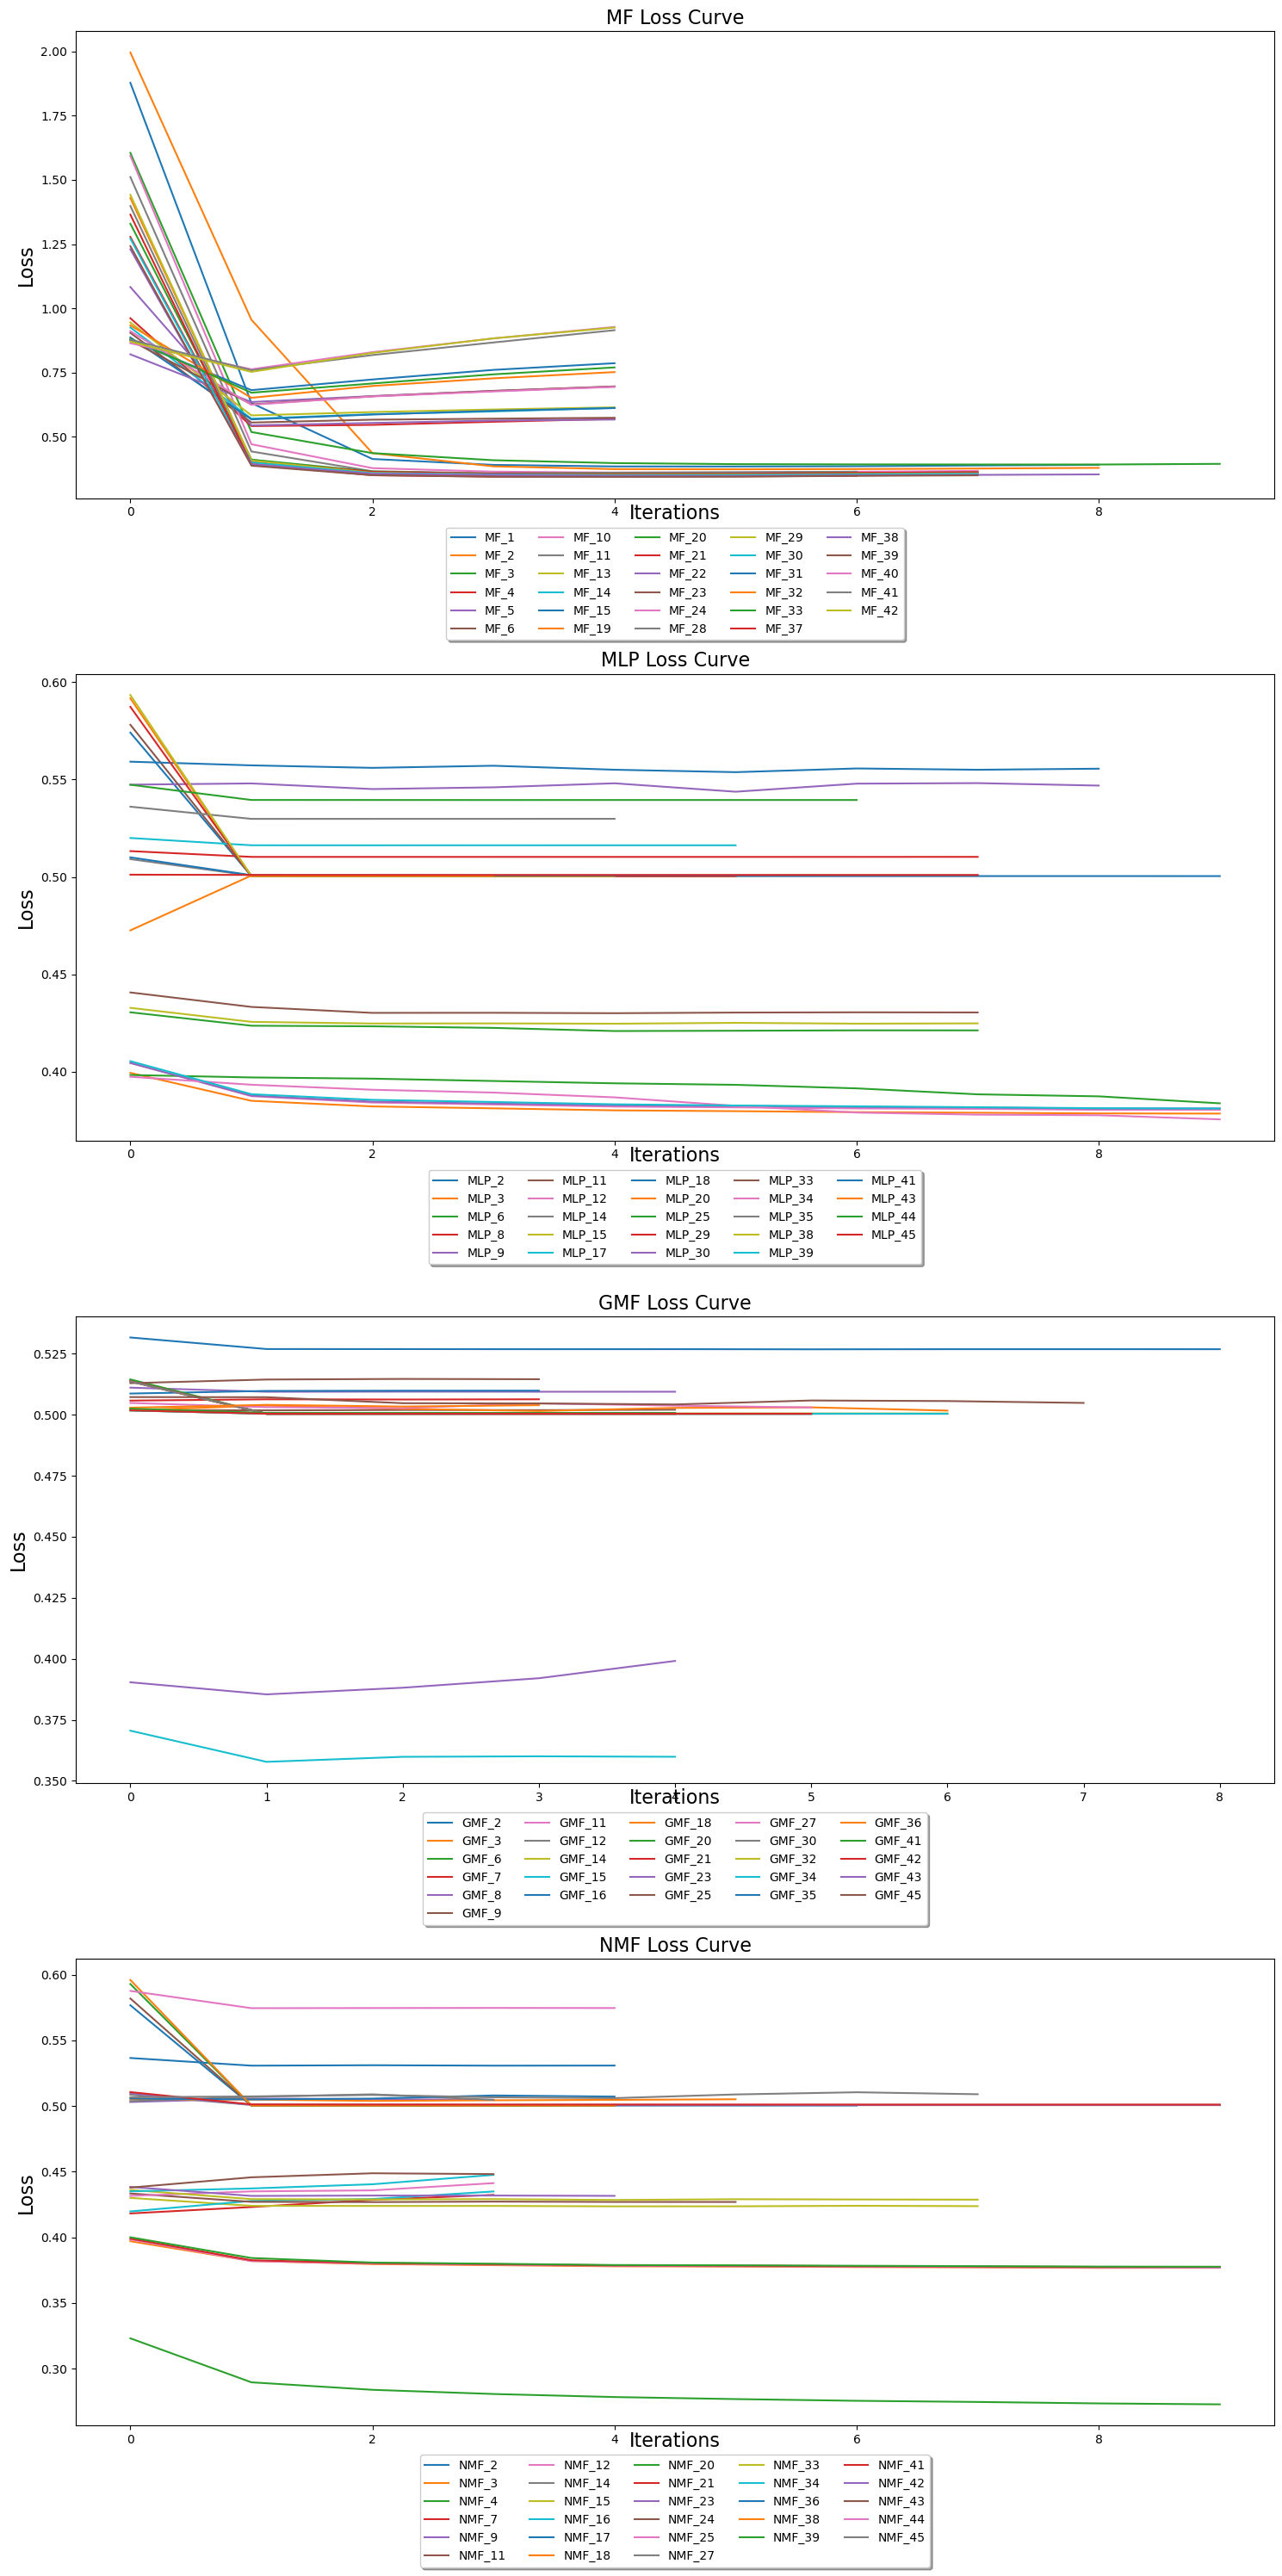

In [923]:
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,30))
i=0
for sp in fig.axes:
    for nll,(name,scores) in dfs[i][dfs[i].metric=='LOSS'][['model','score']].iterrows():
        sp.plot(scores,label=name) 
    sp.set_title(f"{dfs[i].model.iloc[0].split('_')[0]} Loss Curve",fontsize = 16)
    sp.set_xlabel("Iterations",fontsize = 16, va = 'bottom')
    sp.set_ylabel("Loss",fontsize = 16)
    sp.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    i+=1
plt.tight_layout()
# plt.subplots_adjust(bottom = 0.012)

### Picking the best parameteres for each model:

As seen in the following cells, when picking the best parameters,<br>
we found out that for MLP and NMF with lowest yielded loss, overfitting occured in validation so we <br> chose the second lowest yielded loss.<br>
for GMF, we took the third lowest yielded loss for the same reasons

In [927]:
params = [(num_factors,learning_rate,regul) for num_factors in [5,8,12,15,20]
    for learning_rate in [0.0005,0.005,0.05]
        for regul in [0,0.1,0.001]]

In [928]:
mf_best_name = dfs[0][dfs[0].metric == 'LOSS'].reset_index(drop=True).loc[dfs[0][dfs[0].metric == 'LOSS'].reset_index(drop=True).score.apply(min).nsmallest(10).index[0]].model
mlp_best_name = dfs[1][dfs[1].metric == 'LOSS'].reset_index(drop=True).loc[dfs[1][dfs[1].metric == 'LOSS'].reset_index(drop=True).score.apply(min).nsmallest(10).index[1]].model
gmf_best_name = dfs[2][dfs[2].metric == 'LOSS'].reset_index(drop=True).loc[dfs[2][dfs[2].metric == 'LOSS'].reset_index(drop=True).score.apply(min).nsmallest(10).index[2]].model
nmf_best_name = dfs[3][dfs[3].metric == 'LOSS'].reset_index(drop=True).loc[dfs[3][dfs[3].metric == 'LOSS'].reset_index(drop=True).score.apply(min).nsmallest(10).index[1]].model
best_names= [mf_best_name,mlp_best_name,gmf_best_name,nmf_best_name]

mf_params = params[int(mf_best_name.split('_')[1])-1]
mlp_params =  params[int(mlp_best_name.split('_')[1])-1] #the smallest loss set overfitted so wasnt picked
gmf_params = params[int(gmf_best_name.split('_')[1])-1] #the two smallest loss sets overfitted so wasnt picked
nmf_params = params[int(nmf_best_name.split('_')[1])-1] #the smallest loss set overfitted so wasnt picked
all_params = [mf_params,mlp_params,gmf_params,nmf_params]
for i,item in enumerate(all_params):
    print("#"*75,'\n')
    print(f"Best parameters found for {dfs[i].model.iloc[0].split('_')[0]} model are:\n")
    print(f"Latent factor: {item[0]}, Learning rate: {item[1]}, regularization: {item[2]}\n")
    print(f"found on hyperparameters set number {best_names[i].split('_')[1]} out of 45 \n")
print("#"*75)

########################################################################### 

Best parameters found for MF model are:

Latent factor: 20, Learning rate: 0.0005, regularization: 0.001

found on hyperparameters set number 39 out of 45 

########################################################################### 

Best parameters found for MLP model are:

Latent factor: 5, Learning rate: 0.0005, regularization: 0.001

found on hyperparameters set number 3 out of 45 

########################################################################### 

Best parameters found for GMF model are:

Latent factor: 15, Learning rate: 0.0005, regularization: 0.001

found on hyperparameters set number 30 out of 45 

########################################################################### 

Best parameters found for NMF model are:

Latent factor: 5, Learning rate: 0.0005, regularization: 0.001

found on hyperparameters set number 3 out of 45 

#############################################################

In [929]:
best_models = []
for i in range(4):
    best_models.append(dfs[i][dfs[i].model == best_names[i]])

<br><br><br><br>
Train & Validation Loss:

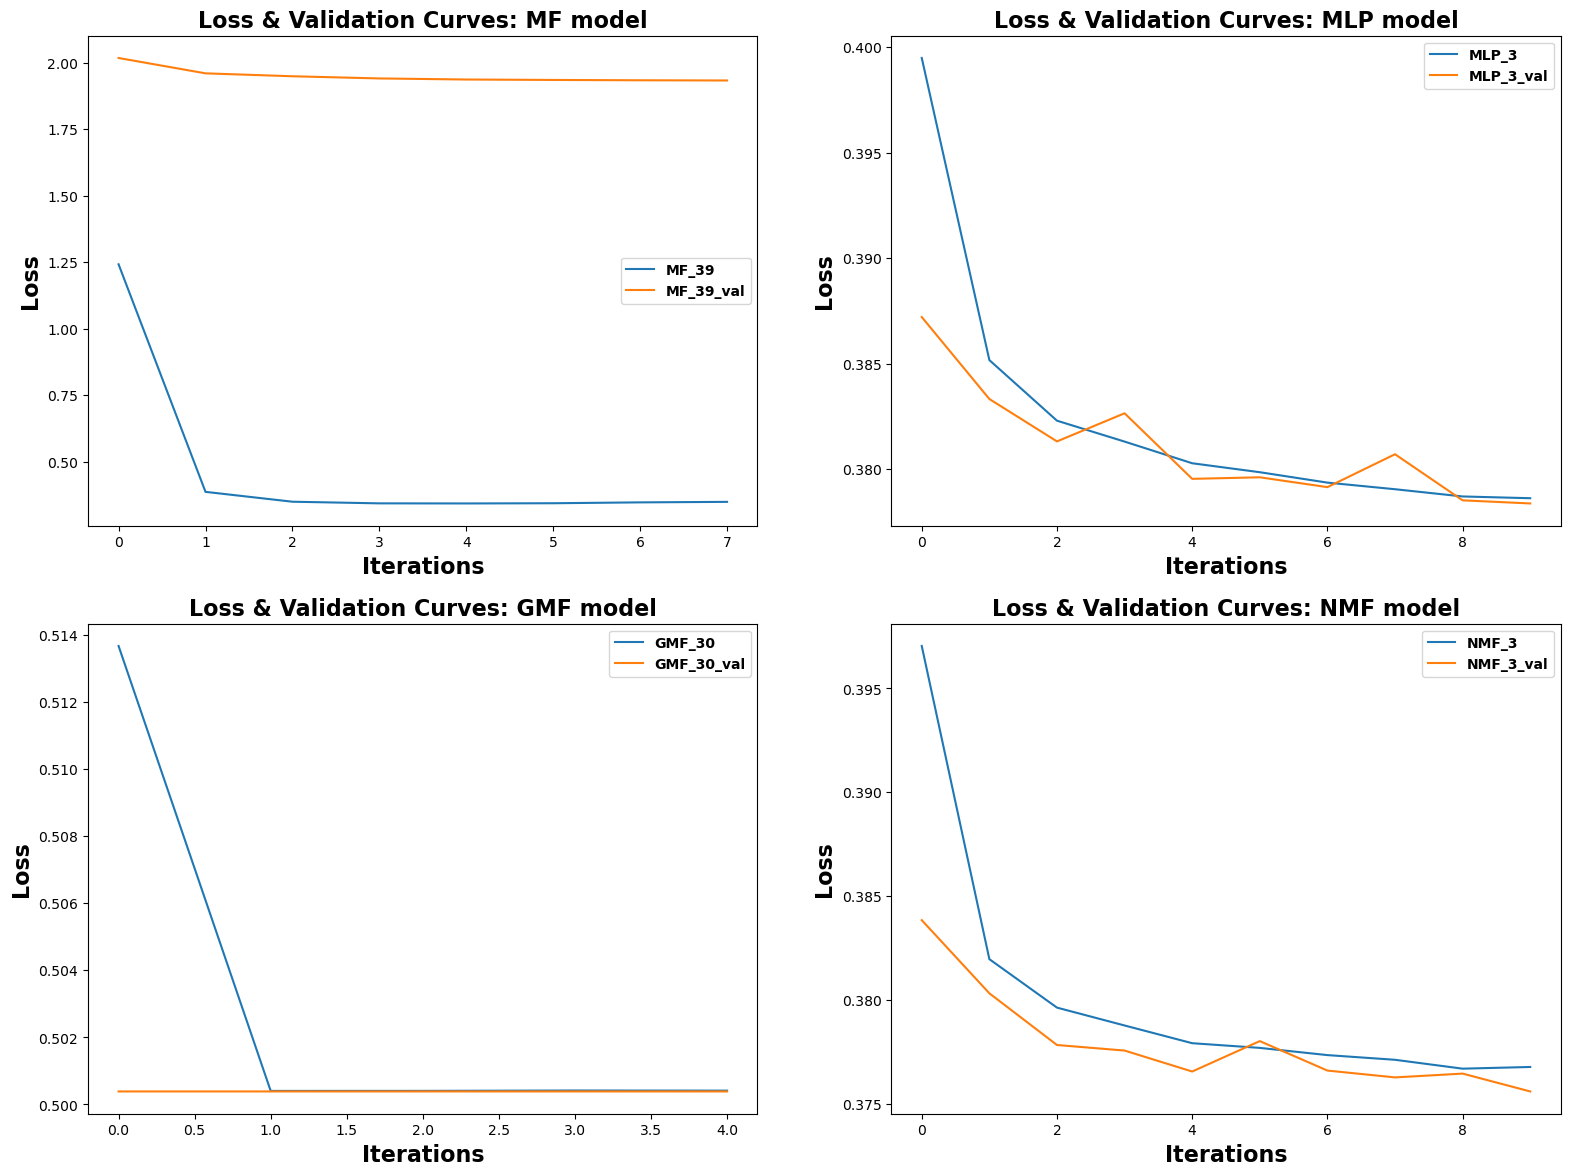

In [930]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(19,14))
i=0
for sp in fig.axes:
    for nll,(name,scores) in best_models[i][best_models[i].metric=='LOSS'][['model','score']].iterrows():
        sp.plot(scores,label=name) 
    for nll,(name,scores) in best_models[i][best_models[i].metric=='VAL'][['model','score']].iterrows():
        sp.plot(scores,label=name+'_val')     
    sp.set_title(f"Loss & Validation Curves: {name.split('_')[0]} model",fontsize = 16,weight="bold")
    sp.set_xlabel("Iterations",fontsize = 16,weight="bold")
    sp.set_ylabel("Loss",fontsize = 16,weight="bold")
    sp.legend(prop={'weight':'bold'})
    i+=1

We see that the chosen hyperparameters didnt perform well on GMF, and the proof of that is the metrics results which are close to 0 for GMF model:

In [935]:
best_models[2][best_models[2].topk !=0]

,model,topk,metric,score
156,GMF_30,5,HR,0.001159
157,GMF_30,5,NDCG,0.000581
158,GMF_30,5,MRR,0.000392
159,GMF_30,10,HR,0.002815
160,GMF_30,10,NDCG,0.001105
161,GMF_30,10,MRR,0.000601


So, we have to make a new tuning for our hyperparameters. but now, we will increase the batch size and see if it solves the validation overfitting:

![batUrl](https://c.tenor.com/0dUwC5nmPxEAAAAC/batman-tears.gif "bat")

In [791]:
params_gmf = []
results_gmf = []
i = 0
batch_size = 1024
epochs = 10
for num_factors in tqdm([5,8,12,15,20]):
    for learning_rate in [0.0005,0.005]:
        for regul in [0]:
            i+=1
            print(f"### Iteration number {i} out of 10 ###")
            results = pd.DataFrame(columns = ['model', 'topk','metric','score']) # as suggested to us

            #gmf
            model= get_GMF_model(num_users, num_items, num_factors, regs=[[regul,regul]])
            model.compile(optimizer = Adam(lr=learning_rate), loss = 'binary_crossentropy')
            train(model)
            print('#')
            
            #save history
            params_gmf.append([num_factors,learning_rate,regul])
            results_gmf.append(results.copy())

  0%|          | 0/5 [00:00<?, ?it/s]

### Iteration number 1 out of 10 ###
3884/3884 [==============================] - 3s 801us/step - loss: 0.3460 - val_loss: 0.5590
OVERFIT OCCURED! Stopping...
#
### Iteration number 2 out of 10 ###
3884/3884 [==============================] - 3s 803us/step - loss: 0.2914 - val_loss: 0.5200
OVERFIT OCCURED! Stopping...
#
### Iteration number 3 out of 10 ###
3884/3884 [==============================] - 3s 862us/step - loss: 0.3302 - val_loss: 0.5680
OVERFIT OCCURED! Stopping...
#
### Iteration number 4 out of 10 ###
3884/3884 [==============================] - 3s 841us/step - loss: 0.2695 - val_loss: 0.5032
#
### Iteration number 5 out of 10 ###
3884/3884 [==============================] - 3s 892us/step - loss: 0.3074 - val_loss: 0.5801
OVERFIT OCCURED! Stopping...
#
### Iteration number 6 out of 10 ###
3884/3884 [==============================] - 4s 958us/step - loss: 0.2530 - val_loss: 0.5032
#
### Iteration number 7 out of 10 ###
3884/3884 [==============================] - 4s 1ms/ste

saving the results:

In [793]:
i=0
for df in results_gmf:
    i+=1
    df.to_csv(f'combination_witf_val_gmf_{i}.csv', index=False)

loading the results:

In [936]:
results_gmf = []
for i in range(1,11):
    results_gmf.append(pd.read_csv(f'combination_witf_val_gmf_{i}.csv'))

some logistics to split the dataframes into 4 dataframes - one for each model with 45 different hypeparameters:

In [937]:
i=0
for df in results_gmf:
    i+=1
    df.model = df.model+'_'+str(i)

In [938]:
i=0
gmf_df=pd.DataFrame(columns = ['model', 'topk','metric','score'])
for df in results_gmf:
    i+=1
    gmf_df=gmf_df.append(df[df.model ==('GMF_'+str(i))]).reset_index(drop = True)
# dfs = [mf_df,mlp_df,gmf_df,nmf_df]
for df in [gmf_df]:
    for metric in df.metric.unique():
        df.score.loc[df[df.metric == metric].score.apply(literal_eval).index]= df[df.metric == metric].score.apply(literal_eval)

In [939]:
dfs[2] = gmf_df

#### Re - Plotting with new calculated GMF model:

In [940]:
params_gmf = [(num_factors,learning_rate,regul) for num_factors in [5,8,12,15,20]
    for learning_rate in [0.0005,0.005]
        for regul in [0]]

In [941]:
mf_best_name = dfs[0][dfs[0].metric == 'LOSS'].reset_index(drop=True).loc[dfs[0][dfs[0].metric == 'LOSS'].reset_index(drop=True).score.apply(min).nsmallest(10).index[0]].model
mlp_best_name = dfs[1][dfs[1].metric == 'LOSS'].reset_index(drop=True).loc[dfs[1][dfs[1].metric == 'LOSS'].reset_index(drop=True).score.apply(min).nsmallest(10).index[1]].model #the smallest loss set overfitted so wasnt picked
gmf_best_name = dfs[2][dfs[2].metric == 'LOSS'].reset_index(drop=True).loc[dfs[2][dfs[2].metric == 'LOSS'].reset_index(drop=True).score.apply(min).nsmallest(10).index[0]].model
nmf_best_name = dfs[3][dfs[3].metric == 'LOSS'].reset_index(drop=True).loc[dfs[3][dfs[3].metric == 'LOSS'].reset_index(drop=True).score.apply(min).nsmallest(10).index[1]].model #the smallest loss set overfitted so wasnt picked
best_names= [mf_best_name,mlp_best_name,gmf_best_name,nmf_best_name]

mf_params = params[int(mf_best_name.split('_')[1])-1]
mlp_params =  params[int(mlp_best_name.split('_')[1])-1] 
gmf_params = params_gmf[int(gmf_best_name.split('_')[1])-1] 
nmf_params = params[int(nmf_best_name.split('_')[1])-1] 
all_params = [mf_params,mlp_params,gmf_params,nmf_params]
for i,item in enumerate(all_params):
    print("#"*75,'\n')
    print(f"Best parameters found for {dfs[i].model.iloc[0].split('_')[0]} model are:\n")
    print(f"Latent factor: {item[0]}, Learning rate: {item[1]}, regularization: {item[2]}\n")
    if dfs[i].model.iloc[0].split('_')[0] == 'GMF':
        print(f"found on hyperparameters set number {int(best_names[i].split('_')[1])+45} out of 55 \n")
        print(f"Batch size used was {1024} with {4} negative samplings\n")
        continue
    print(f"found on hyperparameters set number {best_names[i].split('_')[1]} out of 45 \n")
    print(f"Batch size used was {256} with {4} negative samplings\n")
print("#"*75)

########################################################################### 

Best parameters found for MF model are:

Latent factor: 20, Learning rate: 0.0005, regularization: 0.001

found on hyperparameters set number 39 out of 45 

Batch size used was 256 with 4 negative samplings

########################################################################### 

Best parameters found for MLP model are:

Latent factor: 5, Learning rate: 0.0005, regularization: 0.001

found on hyperparameters set number 3 out of 45 

Batch size used was 256 with 4 negative samplings

########################################################################### 

Best parameters found for GMF model are:

Latent factor: 20, Learning rate: 0.005, regularization: 0

found on hyperparameters set number 55 out of 55 

Batch size used was 1024 with 4 negative samplings

########################################################################### 

Best parameters found for NMF model are:

Latent factor: 5, Learning

In [942]:
best_models = []
for i in range(4):
    best_models.append(dfs[i][dfs[i].model == best_names[i]])

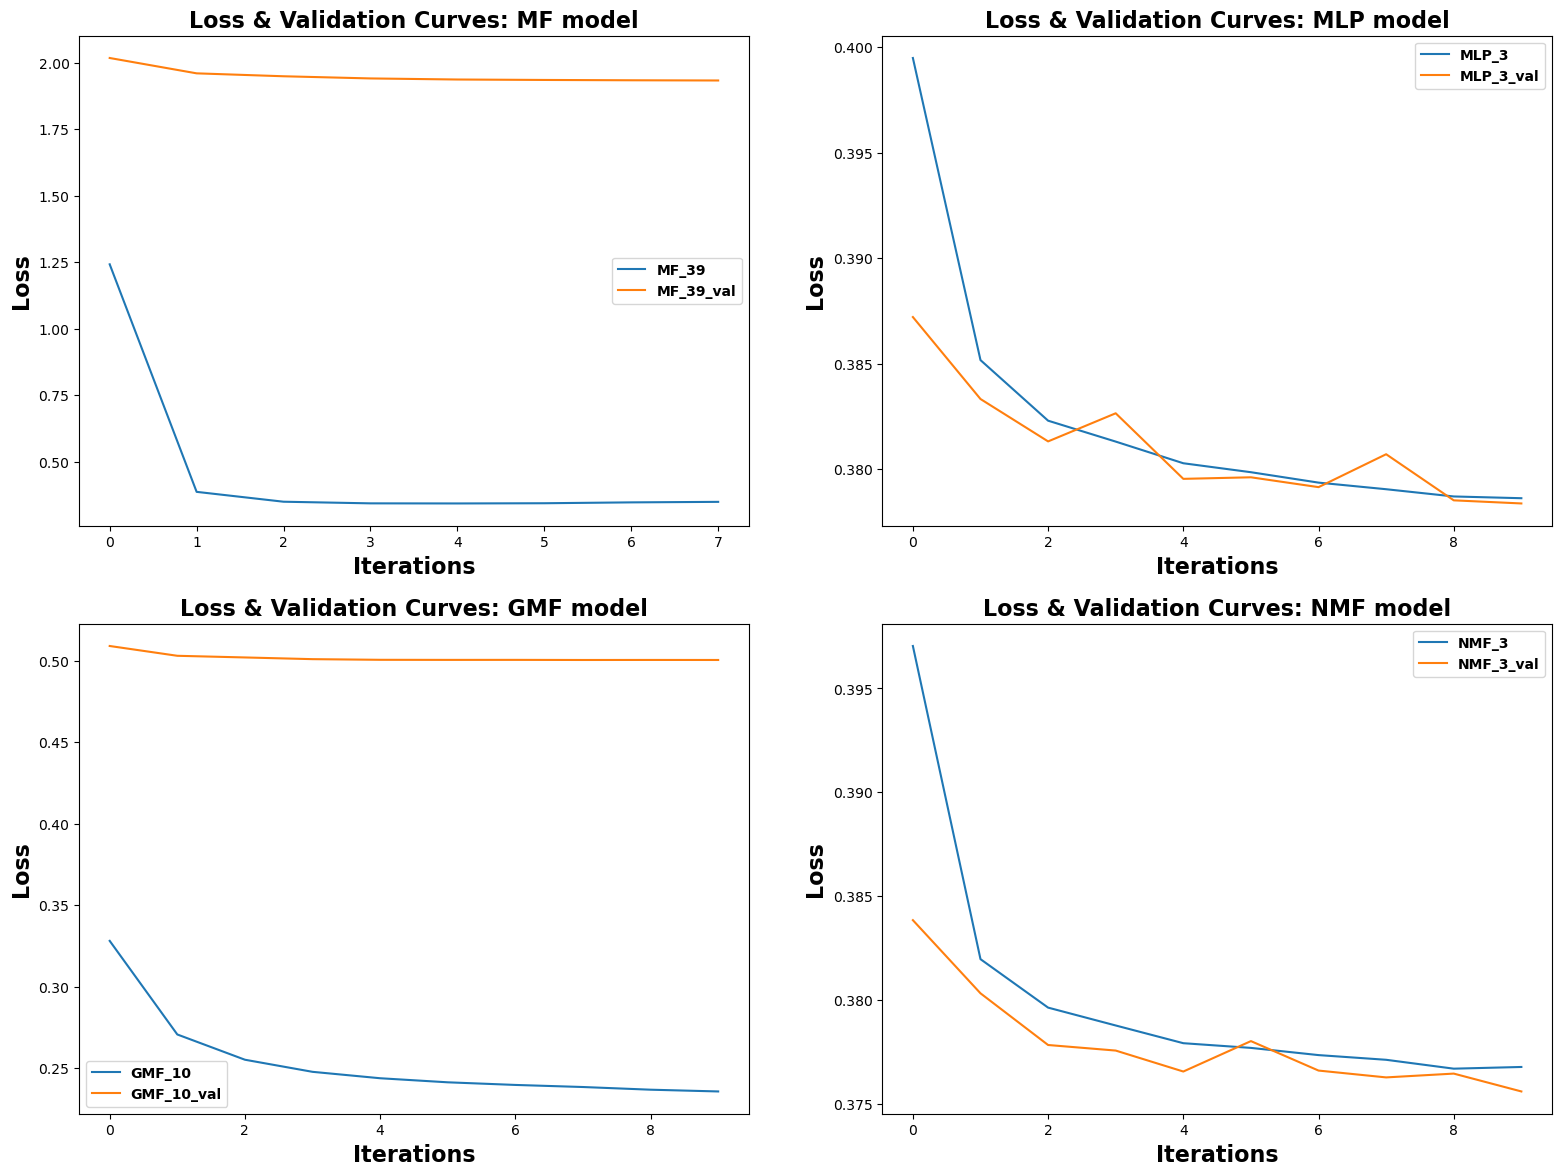

In [943]:
plt.style.use('default')
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(19,14))
i=0
for sp in fig.axes:
    for nll,(name,scores) in best_models[i][best_models[i].metric=='LOSS'][['model','score']].iterrows():
        sp.plot(scores,label=name) 
    for nll,(name,scores) in best_models[i][best_models[i].metric=='VAL'][['model','score']].iterrows():
        sp.plot(scores,label=name+'_val')     
    sp.set_title(f"Loss & Validation Curves: {name.split('_')[0]} model",fontsize = 16,weight="bold")
    sp.set_xlabel("Iterations",fontsize = 16,weight="bold")
    sp.set_ylabel("Loss",fontsize = 16,weight="bold")
    sp.legend(prop={'weight':'bold'})
    i+=1

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
All Results:

In [944]:
best_models_df = pd.DataFrame(columns = best_models[0].columns)
for mod in best_models:
    best_models_df = best_models_df.append(mod)
best_models_df.model = best_models_df.model.str.split('_').apply(lambda x: x[0])
best_models_df

,model,topk,metric,score
225,MF,0,TIME,133.932922
226,MF,0,LOSS,"[1.2419511079788208, 0.3867889940738678, 0.349..."
227,MF,0,VAL,"[2.0173609256744385, 1.9596683979034424, 1.948..."
228,MF,5,HR,0.418212
229,MF,5,NDCG,0.283509
230,MF,5,MRR,0.239236
231,MF,10,HR,0.568377
232,MF,10,NDCG,0.3319
233,MF,10,MRR,0.25911
9,MLP,0,TIME,132.613425


Training Time:

In [945]:
# plot

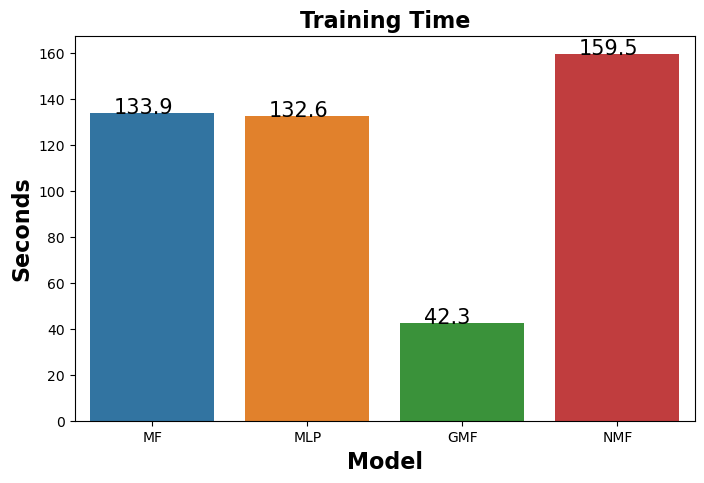

In [946]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='model', y='score',data =best_models_df[best_models_df.metric =='TIME'])
for p in ax.patches:
    value = '{:.1f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.25
    y = p.get_y() + p.get_height()
    ax.annotate(value, (x, y), size = 15)
plt.title("Training Time",fontsize = 16,weight = 'bold')
plt.xlabel('Model',fontsize = 16,weight = 'bold')
plt.ylabel('Seconds',fontsize = 16,weight = 'bold')
plt.show()

Metric Evaluation:

In [947]:
# plot suggestion/example - you may create your own plot (you should achieve higher results)

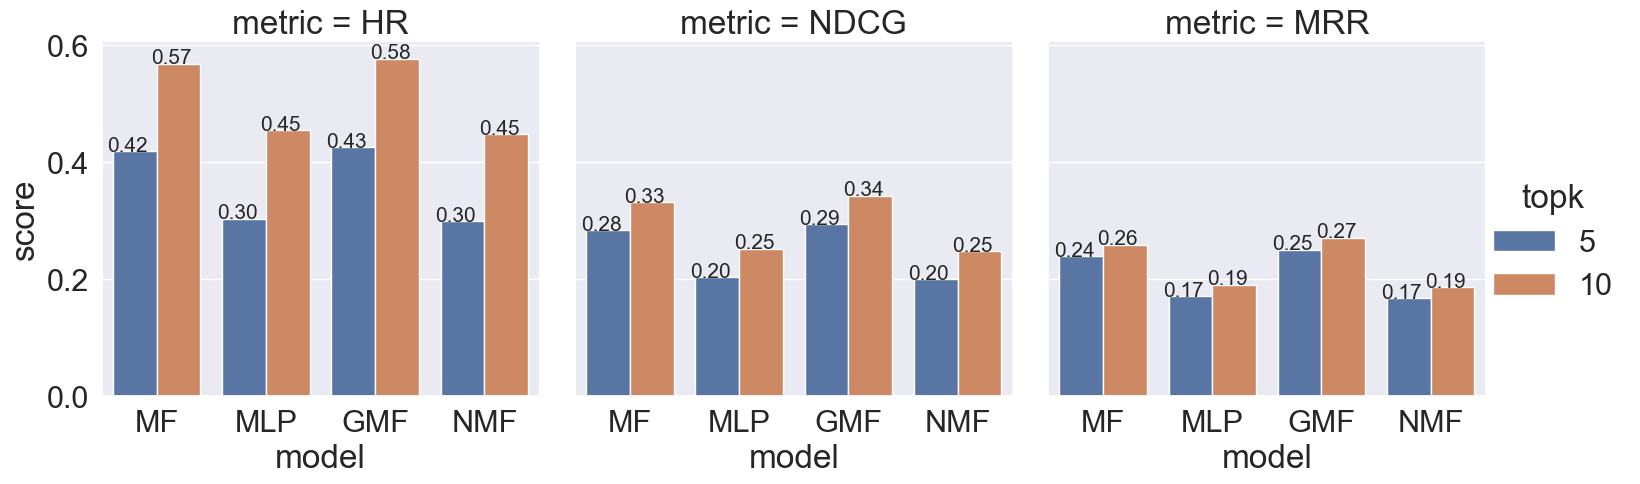

In [948]:
sns.set(font_scale = 2)
ax = sns.catplot(x='model', y='score',hue="topk",col="metric", data = best_models_df[best_models_df.topk !=0], kind="bar")
for i in range(3):
    axx = ax.facet_axis(0,i)
    for p in axx.patches:
        value = '{:.2f}'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2 - 0.25
        y = p.get_y() + p.get_height()
        axx.annotate(value, (x, y), size = 15)

In [949]:
plt.style.use('default')

<br><br><br><br>
<br><br><br><br>

**c. How the values of MRR and NDCG are differ from the results you got in the previous exercises which implemented the explicit recommendation approach. What are the difference in preparing the dataset for evaluation.**

In previous homeworks we used the classical MF algorithm, in this homework we used deep learning. in previous assignments we used explicit rating, while on this assignment we used implicit ratings.<br>
So, in the explicit assignments we dealt with a regression problem, where we wanted to predict a continuous value (1 to 5) of rating,<br>
where on the other-hand the rating on this assignments is binary so we deal with classification problem.
<br>
hence, there will be changes in the metrics results, thus the comparison between previous assignments is not 100% legit because we want to compare apples to apples.
But nevertheless, in general, we got higher MRR and NDCG results in previous assignments, which make us wonder and think that one should also try classical approaches before trying some sophisticated DL model, because they might yield great results.
<br><br>
We would except that the deep learning models will lead to better results, but in reality the MF out-performed NMF and MLP on the same batch size.
when we had no other option and we raised the batch size of GMF, and it also yielded results similar to MF
in terms of metrics results.<br>
It is a very good sign for the MF since its running time is much faster and also its metrics are good as much as the deep learning algorithms.
<br><br>
If we had more time we would raise the batch to 1024 for all the models and see what happens then.

In addition the evaluation in this assignment took much more time because of the testNegatives, comparing to other assignments.

**d. How will you measure item similarity using the NeuMF model?**

The embedding layer can represent a latent behaviour of each item. each item "recieves" a vector that represents his "behaviour" and thus symbolizes a unique attributes.<br>
we can then use some similiarity metrics (Cosine similiarity, pearson, etc) on embedded vectors of two items and measure similarity.<br>
Now, this is pretty obvious, but in NeuMF things get interesting due to the fact that the model is embedding the items with two different models:<br>
MLP and MF.<br>
So a question arises when we have two different latent representations for items -> what do we do? which representation we choose?<br>
In our opinion, its a matter of heuristic:<br>
we can apply mean or weighted mean to the vectors from different embedding model and represent each item with a new vector.<br>

<br><br><br>
<br><br><br>
<br><br><br>

## Question 3: Loss Function 
<br><br>

#### a. One of the enhancements presented in the Neural Collaborative Filtering paper is the usage of probabilistic activation function (the sigmoid) and binary cross entropy loss function.   

Select one of the models you implemented in question 2 and change the loss function to a `Mean Squared Error` and the activation function of the last layer to `RELU`.   

Train the model and evaluate it in a similar way to what you did in question 2. 
Compare the results and discuss.

In [837]:

num_factors = 5
learning_rate = 0.0005
reg = 0.001
batch_size = 256
reg = 0.001
results = pd.DataFrame(columns = ['model', 'topk','metric','score']) # as suggested to us
#nmf
model = get_NMF_model(num_users,num_items,num_factors,num_factors,reg_GMF=[[reg,reg]],regs_MLP=[[reg,reg],reg,reg,reg], layers=[32,16,8],final_ac = 'relu',name = 'NMF_with_mse_and_relu')
model.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error')
train(model)
print('#')
#save history

15534/15534 [==============================] - 19s 1ms/step - loss: 0.1214 - val_loss: 0.1228
#


saving the results:

In [880]:
results.to_csv('NMF_part3.csv', index=False)

loading the results:

In [881]:
results_nmf = pd.read_csv('NMF_part3.csv')
for df in [results_nmf]:
    for metric in df.metric.unique():
        df.score.loc[df[df.metric == metric].score.apply(literal_eval).index]= df[df.metric == metric].score.apply(literal_eval)

<br><br><br><br>
<br><br><br><br>
NMFs Results:

In [883]:
nmf_df = pd.concat([best_models[3],results_nmf])
nmf_df

,model,topk,metric,score
9,NMF_3,0,TIME,159.538281
10,NMF_3,0,LOSS,"[0.39704009890556335, 0.381970077753067, 0.379..."
11,NMF_3,0,VAL,"[0.3838467001914978, 0.38032639026641846, 0.37..."
12,NMF_3,5,HR,0.299172
13,NMF_3,5,NDCG,0.199773
14,NMF_3,5,MRR,0.167205
15,NMF_3,10,HR,0.447682
16,NMF_3,10,NDCG,0.247526
17,NMF_3,10,MRR,0.186752
0,NMF_with_mse_and_relu,0,TIME,186.544308


<br><br><br>
<br><br><br>

Train & Validation Loss:

In [884]:
# plot

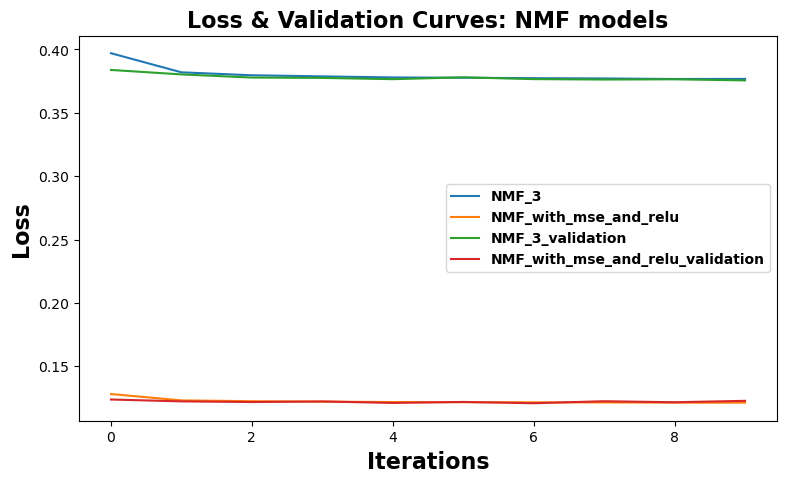

In [885]:
plt.style.use('default')
plt.figure(figsize=(9,5))

for nll,(name,scores) in nmf_df[nmf_df.metric=='LOSS'][['model','score']].iterrows():
    plt.plot(scores,label=name) 
for nll,(name,scores) in nmf_df[nmf_df.metric=='VAL'][['model','score']].iterrows():
    plt.plot(scores,label=name+'_validation')     
plt.title(f"Loss & Validation Curves: {name.split('_')[0]} models",fontsize = 16,weight="bold")
plt.xlabel("Iterations",fontsize = 16,weight="bold")
plt.ylabel("Loss",fontsize = 16,weight="bold")
plt.legend(prop={'weight':'bold'})
plt.show()

<br><br><br>
Training Time:

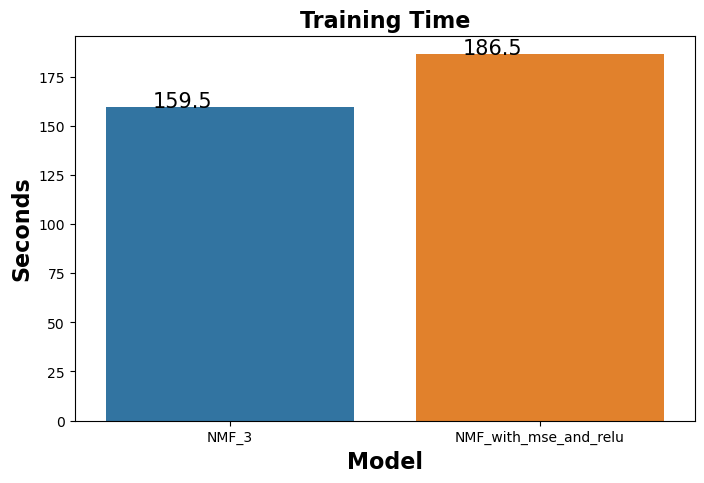

In [886]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='model', y='score',data =nmf_df[nmf_df.metric =='TIME'])
for p in ax.patches:
    value = '{:.1f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.25
    y = p.get_y() + p.get_height()
    ax.annotate(value, (x, y), size = 15)
plt.title("Training Time",fontsize = 16,weight = 'bold')
plt.xlabel('Model',fontsize = 16,weight = 'bold')
plt.ylabel('Seconds',fontsize = 16,weight = 'bold')
plt.show()

<br><br><br>
Metric Evaluation:

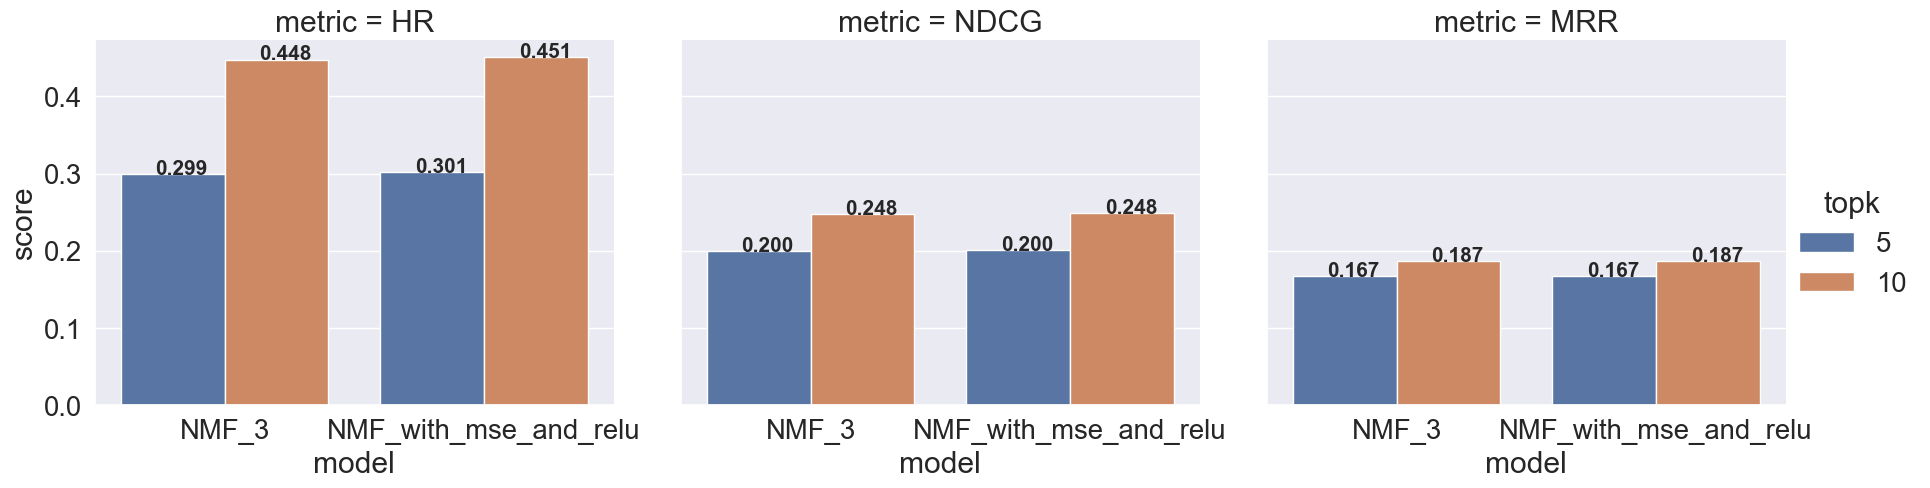

In [893]:
sns.set(font_scale = 1.8)
ax = sns.catplot(x='model', y='score',hue="topk",col="metric", data = nmf_df[nmf_df.topk !=0], kind="bar",height=5, aspect=1.2)
for i in range(3):
    axx = ax.facet_axis(0,i)
    for p in axx.patches:
        value = '{:.3f}'.format(p.get_height())
        x = p.get_x() + p.get_width() / 3
        y = p.get_y() + p.get_height()
        axx.annotate(value, (x, y), size = 15,weight = 'bold')
plt.show()

<br><br><br><br>
**Conclusions:**

- we started with a reasonable fixed batch size of 256. we decided to tune the hyperparameters of latent factor, Learning rate and regularization. <br> for learning rate and regularization we used numbers from different kind of magnitude to recieve different behaviour from each hyperparameter instead of just tweaking with the same order of numbers (0.1,0.2,0.3 etc...).<br> on the other hand, with latent factors we tried not to exceed LF of 20 (as in hw1) due to the nature of Matrix Factorization.<br>  we want to compress our items and features as much as we can, doesnt matter its a DL model or not, in order to remain true to the nature of MF - compressing and dimensionality reduction, hence not exceeding a factor of 20, and expressing each item/user with a vector as small as possible.<br> After witnessing overfitting in GMF in all the possible 45 combinations we tried, we decided to unfix the batch size of 256 and increased it to 1024 and then again ran the grid search with same parameters. we were amazed to find out that increasing the batch size only, influenced the GMF such that it exceeded MLP and NMF with the evaluation metric, and with much less training time.<br> we concluded that we should've tweak with the batch size as well due to the fact that it can really improve the model behaviour.it wouldnt mean that all of the models will behave in the exact same trend and improve, and maybe some of them are better to train with batch of 256 rather than increasing to 1024 but we ran out of time and each experiment took very long so dont have a decisive answer for this one.<br> as a future mission for us,especially in final project, we would like to examine a batch size tuning.<br>we decided not to tweak the negative number of sampling hyperparameter due to the fact that it would affect the evaluation time which is already a big deal and takes plenty of time, and its contribution is relatively small - so it wasnt worth it in our opinion.<br><br> 
- We saw in general how the MRR and NDCG results are pretty low compared to previous assignments, but we think that this assignment is just the beginning and there is alot more to inspect and improve because we are sure that Deep Learning models have to do better than that.<br> 

- The NMF with mse and relu has a lower loss by around 1/4 due to the mse calculation: $$MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^{2}$$ but their evaluation scores are around the same.

- The low loss by itself is not good enough to evaluate different models and therefore we need also to evaluate the models by the following metrics: HR,NDCG, MRR.

- We would expect to achieve higher scores in the matrics of the NMF and NMF with mse and relu and we were surprised to see that even the classical MF perform better than these two models.

- The activation function that we used was sigmoid: $$\sigma(x)=\frac{1}{1+e^{-x}}$$

  A function that is good for classifying but struggling in optimizing since sigmoid tends to converge slower.

- Relu: $$relu(x)=max\{0,x\}$$ Also has a problem in optimization below zero but in positive numbers it will work well and will be good for classifying as well.

- Therefore we would expect that using relu as an activation faction will improve our matricts but in reality we got almost the same results for both of the models.

<br><br>
<br><br>


Good Luck :)

thanks!

![batUrl](https://townsquare.media/site/622/files/2012/03/tumblrm0bfdedbau1r5ur0ho1500.gif "bat")